# Income Prediction Problem

### Indrajit Singh

In [1]:
#Importing Libraries
import pandas as pd

import numpy as np

import seaborn as sns

import vpython as vs

import matplotlib.pyplot as plt

from scipy.stats import skew 

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv('D:\\study\\decisiontree\\adult.csv')

In [3]:
data.head(5)

,age,workclass,fnlwgt,education,educational_num,marita_lstatus,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marita_lstatus     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marita_lstatus', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
data.shape

(48842, 15)

In [7]:
data.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marita_lstatus   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
#Counting number of rows containing na
data=data.replace('?', np.nan)
data.shape[0] - data.dropna().shape[0]

3620

In [10]:
data.dropna()

,age,workclass,fnlwgt,education,educational_num,marita_lstatus,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
data=data.drop(['fnlwgt'], axis=1)

In [12]:
skew(data.age)
#moderately Skewed

0.5575631924658626

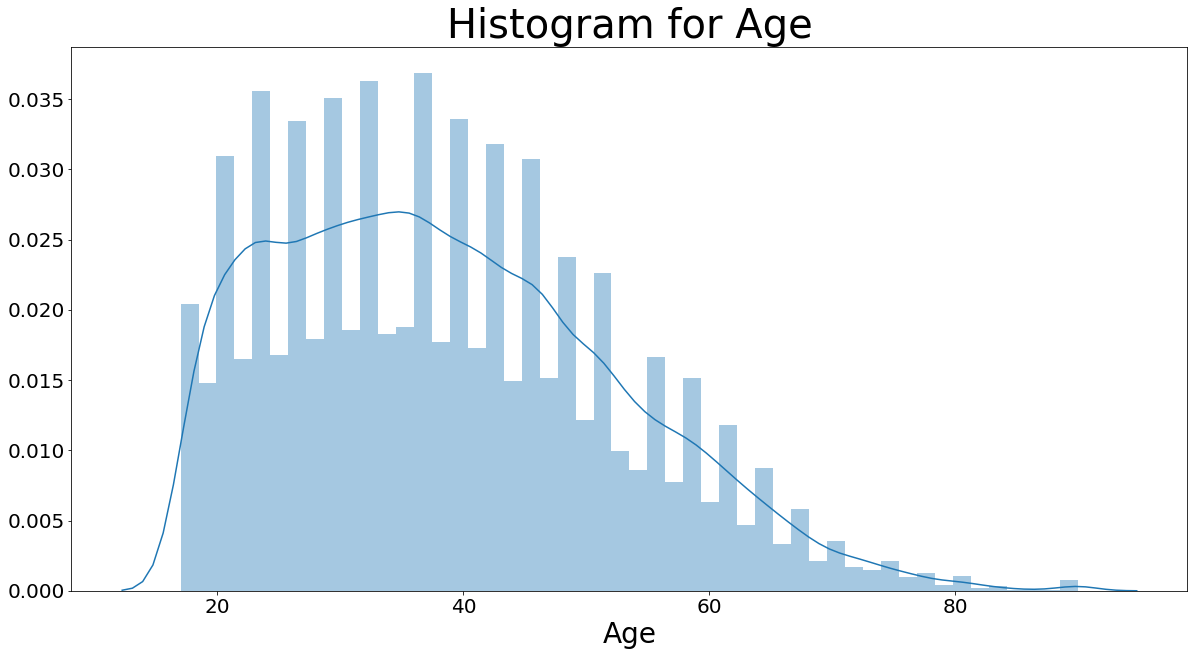

In [13]:
plt.figure(figsize=(20,10))
sns.distplot(data.age)
plt.xlabel("Age", fontsize=28)
#plt.ylabel("No. of Bedrooms", fontsize=28)
plt.title("Histogram for Age", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

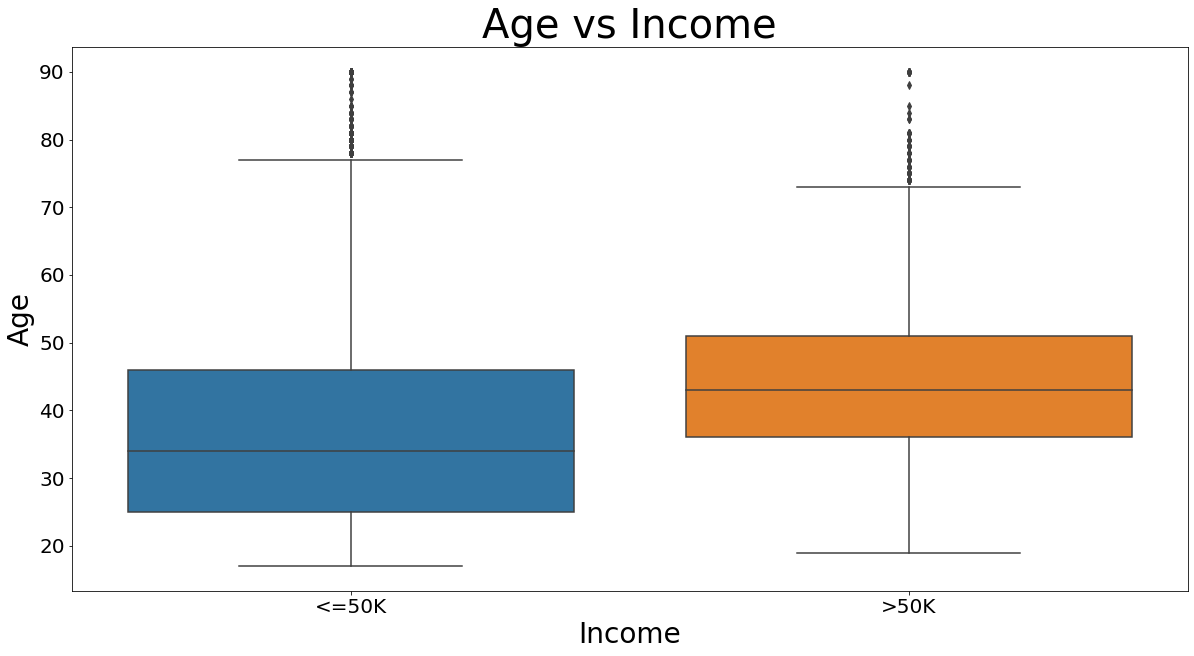

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x="income", y="age", data=data)
plt.xlabel("Income", fontsize=28)
plt.ylabel("Age", fontsize=28)
plt.title("Age vs Income", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [15]:
tab = pd.crosstab(data.workclass, columns="counts")
t = pd.crosstab(data.workclass,columns=data.income).apply(lambda r: r/r.sum()*100, axis=1)
print(tab,t)

col_0             counts
workclass               
Federal-gov         1432
Local-gov           3136
Never-worked          10
Private            33906
Self-emp-inc        1695
Self-emp-not-inc    3862
State-gov           1981
Without-pay           21 income                 <=50K       >50K
workclass                              
Federal-gov        60.824022  39.175978
Local-gov          70.440051  29.559949
Never-worked      100.000000   0.000000
Private            78.213296  21.786704
Self-emp-inc       44.660767  55.339233
Self-emp-not-inc   72.112895  27.887105
State-gov          73.245835  26.754165
Without-pay        90.476190   9.523810


[None, None]

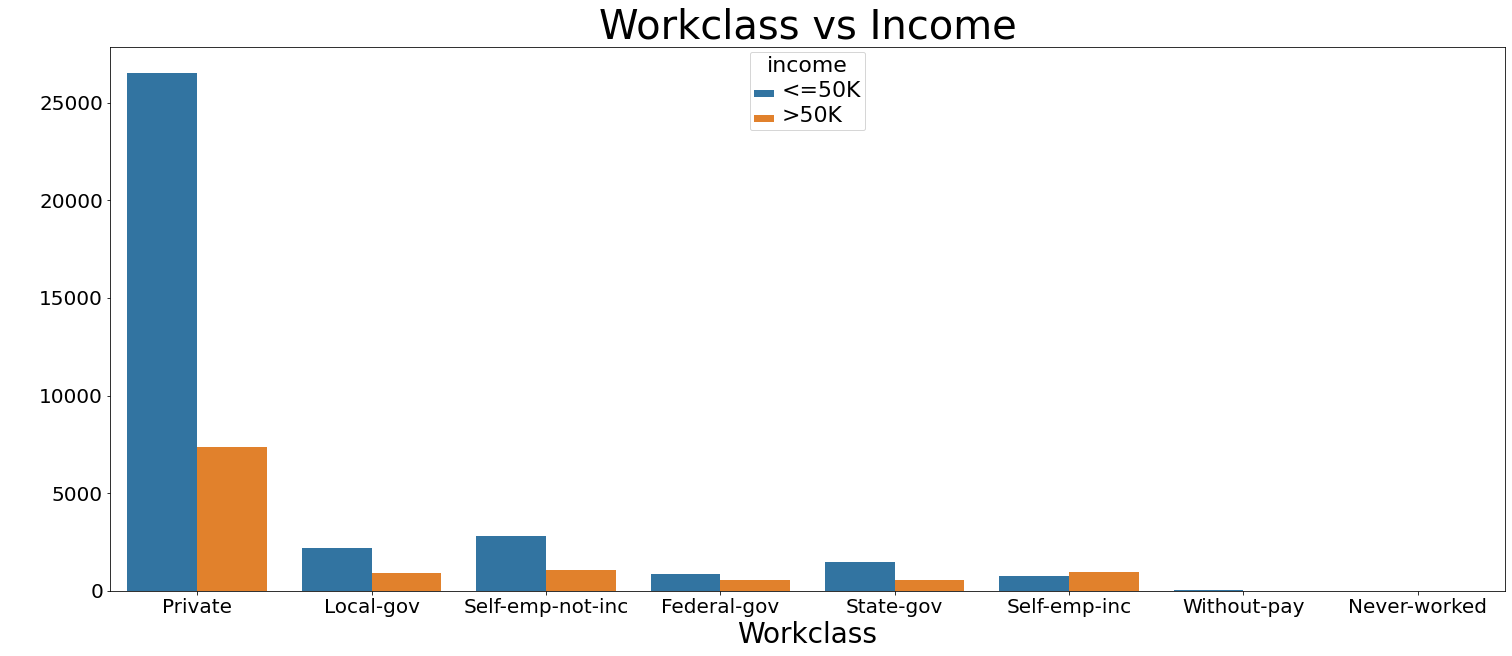

In [16]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x="workclass", hue="income", data=data)
plt.xlabel("Workclass", fontsize=28)
plt.ylabel(" ", fontsize=28)
plt.title("Workclass vs Income", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='22')

In [17]:
tab = pd.crosstab(data.education, columns="counts")
t = pd.crosstab(data.education,columns=data.income).apply(lambda r: r/r.sum()*100, axis=1)
print(tab,t)

col_0         counts
education           
10th            1389
11th            1812
12th             657
1st-4th          247
5th-6th          509
7th-8th          955
9th              756
Assoc-acdm      1601
Assoc-voc       2061
Bachelors       8025
Doctorate        594
HS-grad        15784
Masters         2657
Preschool         83
Prof-school      834
Some-college   10878 income            <=50K       >50K
education                         
10th          93.736501   6.263499
11th          94.922737   5.077263
12th          92.694064   7.305936
1st-4th       96.761134   3.238866
5th-6th       94.695481   5.304519
7th-8th       93.507853   6.492147
9th           94.576720   5.423280
Assoc-acdm    74.203623  25.796377
Assoc-voc     74.672489  25.327511
Bachelors     58.716511  41.283489
Doctorate     27.441077  72.558923
HS-grad       84.142169  15.857831
Masters       45.088446  54.911554
Preschool     98.795181   1.204819
Prof-school   26.019185  73.980815
Some-college  81.035117  18

[None, None]

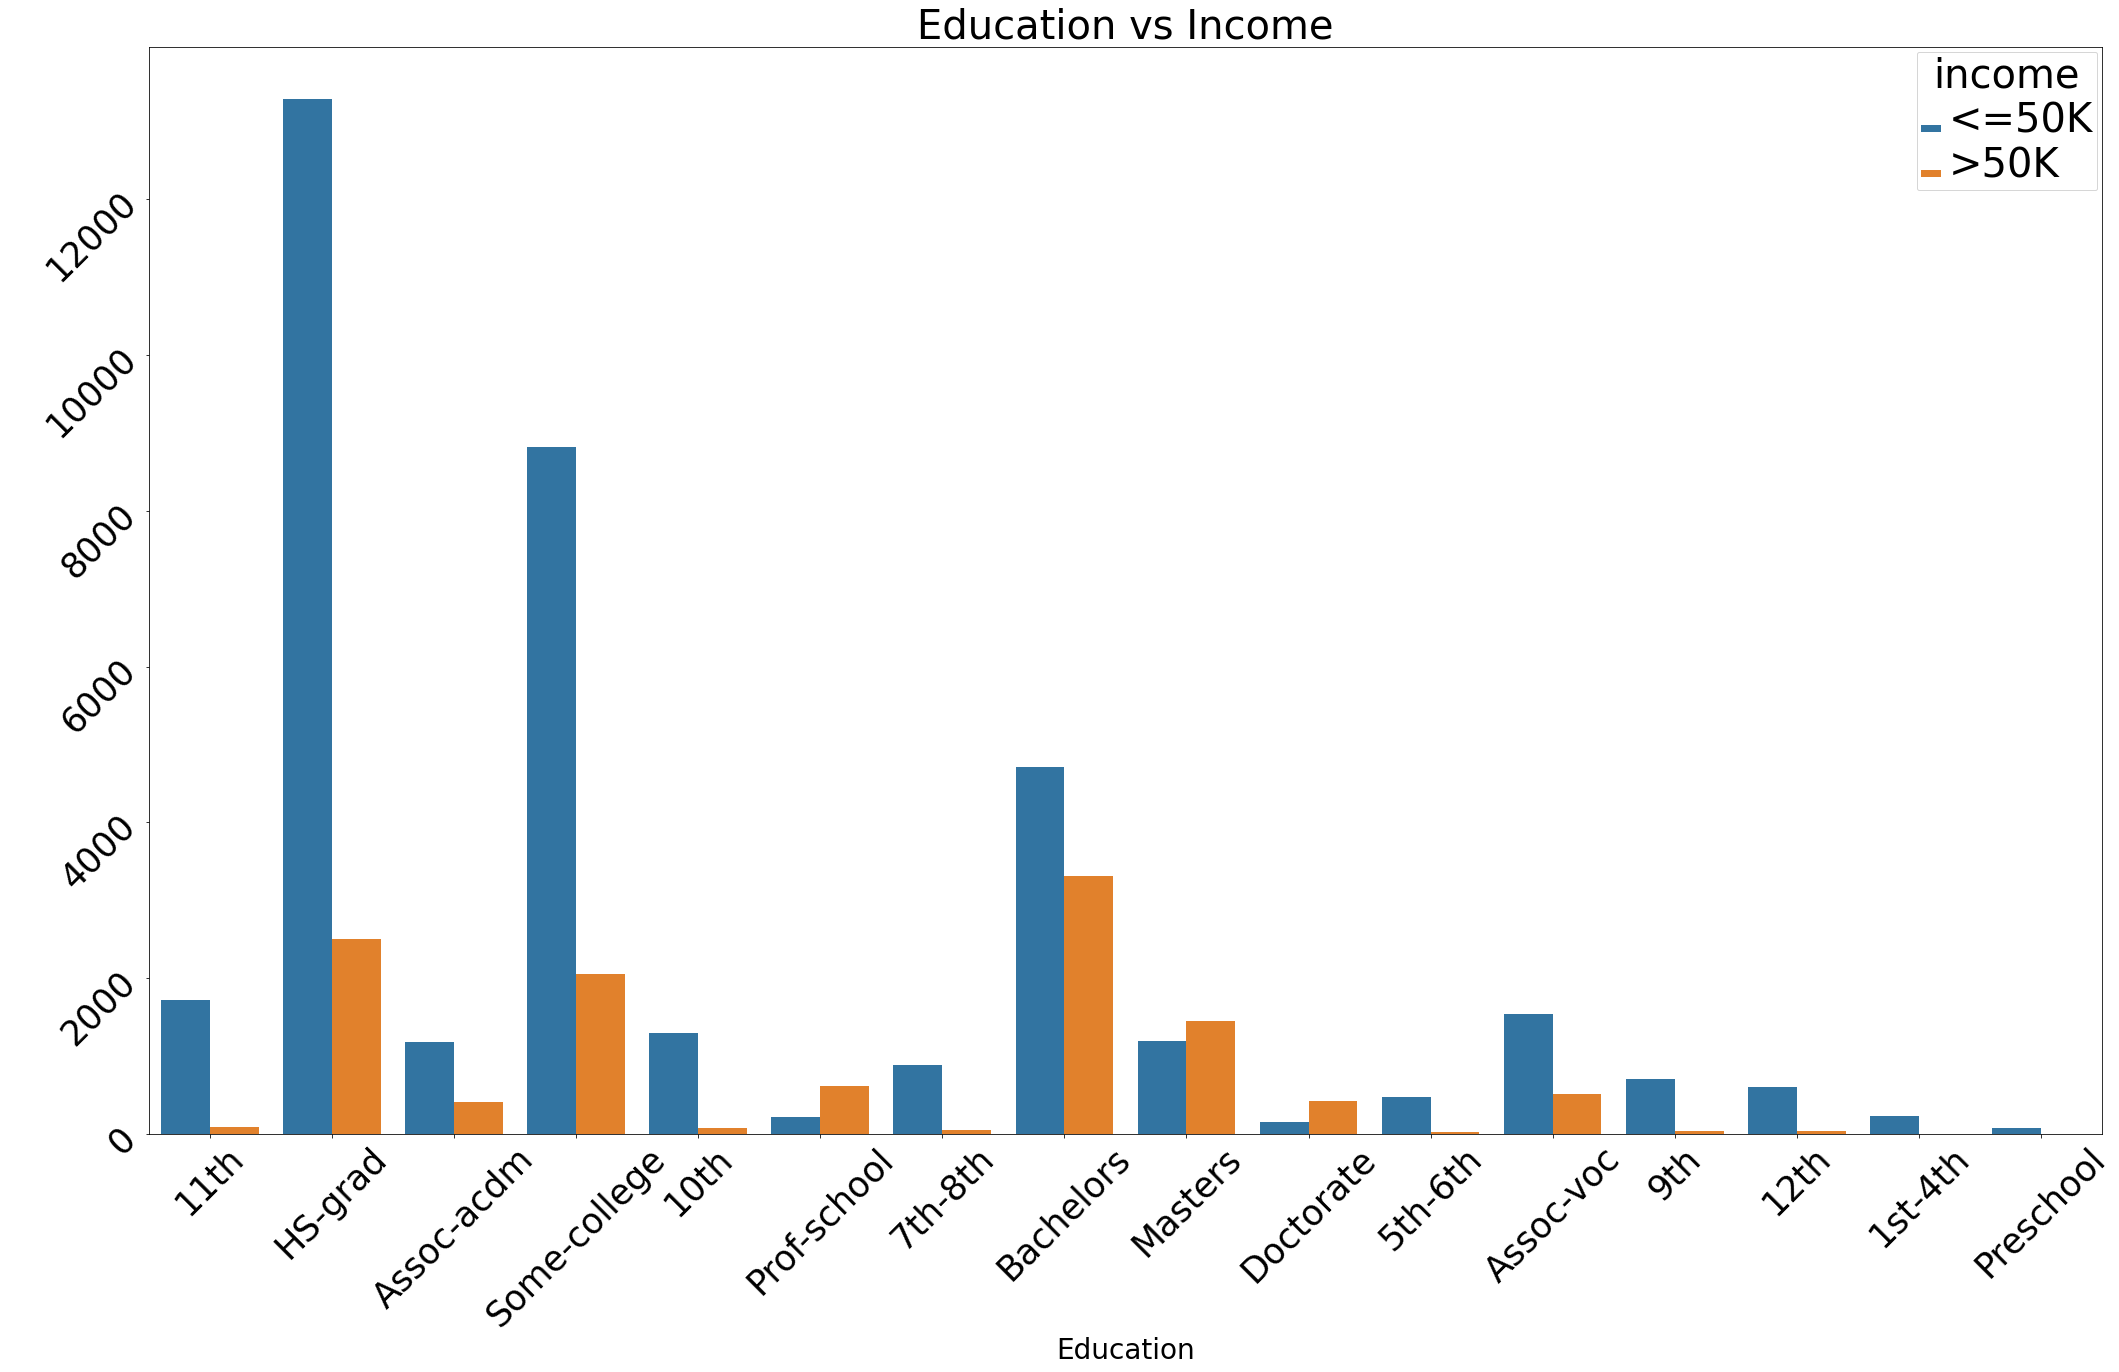

In [18]:
plt.figure(figsize=(35,20))
ax = sns.countplot(x="education", hue="income", data=data)
plt.xlabel("Education", fontsize=28)
plt.ylabel(" ", fontsize=28)
plt.title("Education vs Income", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=35, labelrotation =45)
plt.setp(ax.get_legend().get_texts(), fontsize='40')
plt.setp(ax.get_legend().get_title(), fontsize='40')

In [19]:
t = pd.crosstab(data.educational_num,columns=data.income).apply(lambda r: r/r.sum(), axis=1)
t

income,<=50K,>50K
educational_num,,
1,0.987952,0.012048
2,0.967611,0.032389
3,0.946955,0.053045
4,0.935079,0.064921
5,0.945767,0.054233
6,0.937365,0.062635
7,0.949227,0.050773
8,0.926941,0.073059
9,0.841422,0.158578


[None, None]

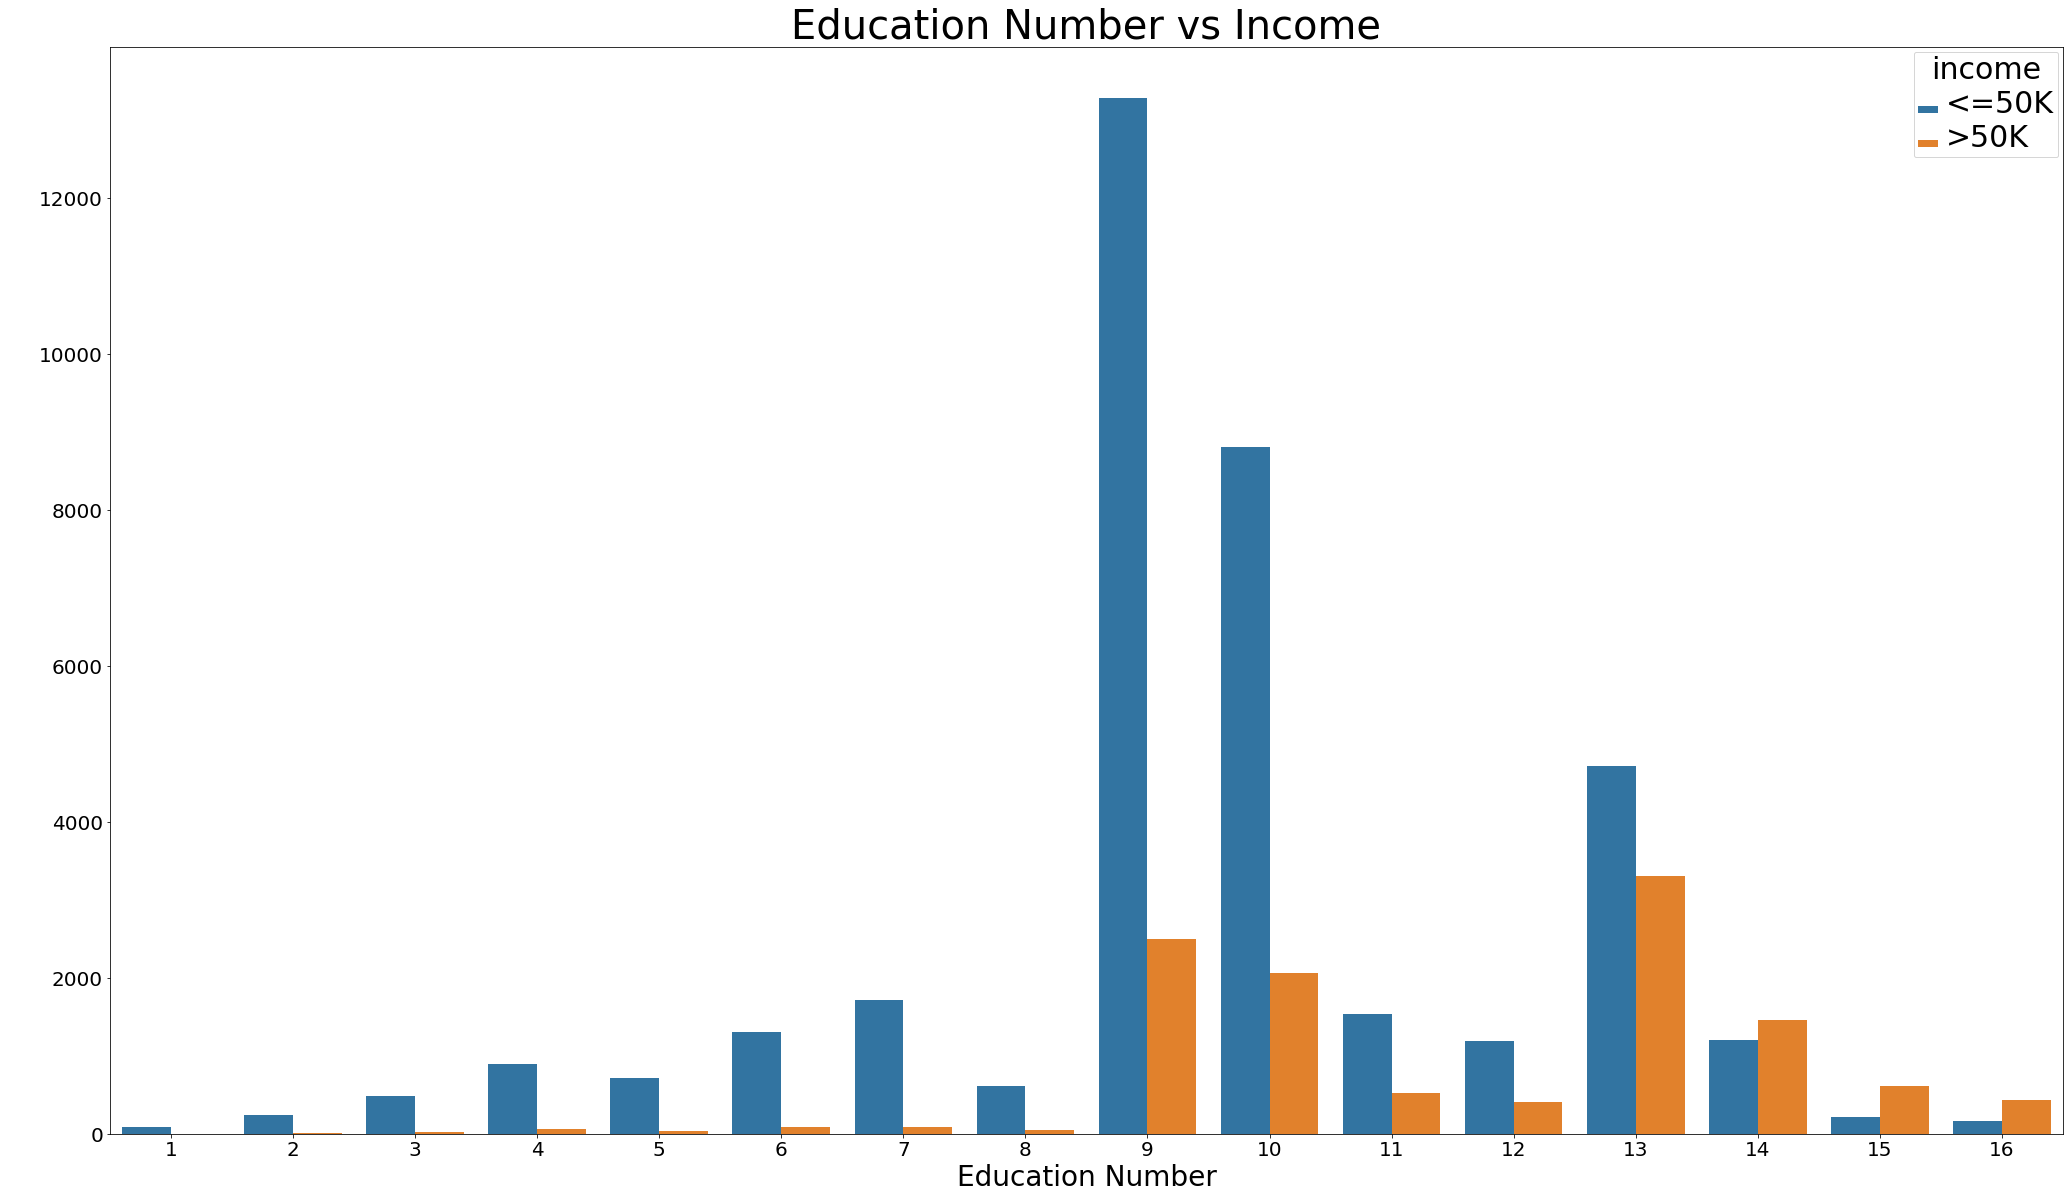

In [20]:
plt.figure(figsize=(35,20))
ax = sns.countplot(x="educational_num", hue="income", data=data)
plt.xlabel("Education Number", fontsize=28)
plt.ylabel(" ", fontsize=28)
plt.title("Education Number vs Income", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='30')
plt.setp(ax.get_legend().get_title(), fontsize='30')

In [21]:
tab = pd.crosstab(data.marita_lstatus, columns="counts")
t = pd.crosstab(data.marita_lstatus,columns=data.income).apply(lambda r: r/r.sum()*100, axis=1)
print(tab,t)

col_0                  counts
marita_lstatus               
Divorced                 6633
Married-AF-spouse          37
Married-civ-spouse      22379
Married-spouse-absent     628
Never-married           16117
Separated                1530
Widowed                  1518 income                     <=50K       >50K
marita_lstatus                             
Divorced               89.883914  10.116086
Married-AF-spouse      62.162162  37.837838
Married-civ-spouse     55.386747  44.613253
Married-spouse-absent  90.764331   9.235669
Never-married          95.452007   4.547993
Separated              93.529412   6.470588
Widowed                91.567852   8.432148


[None, None]

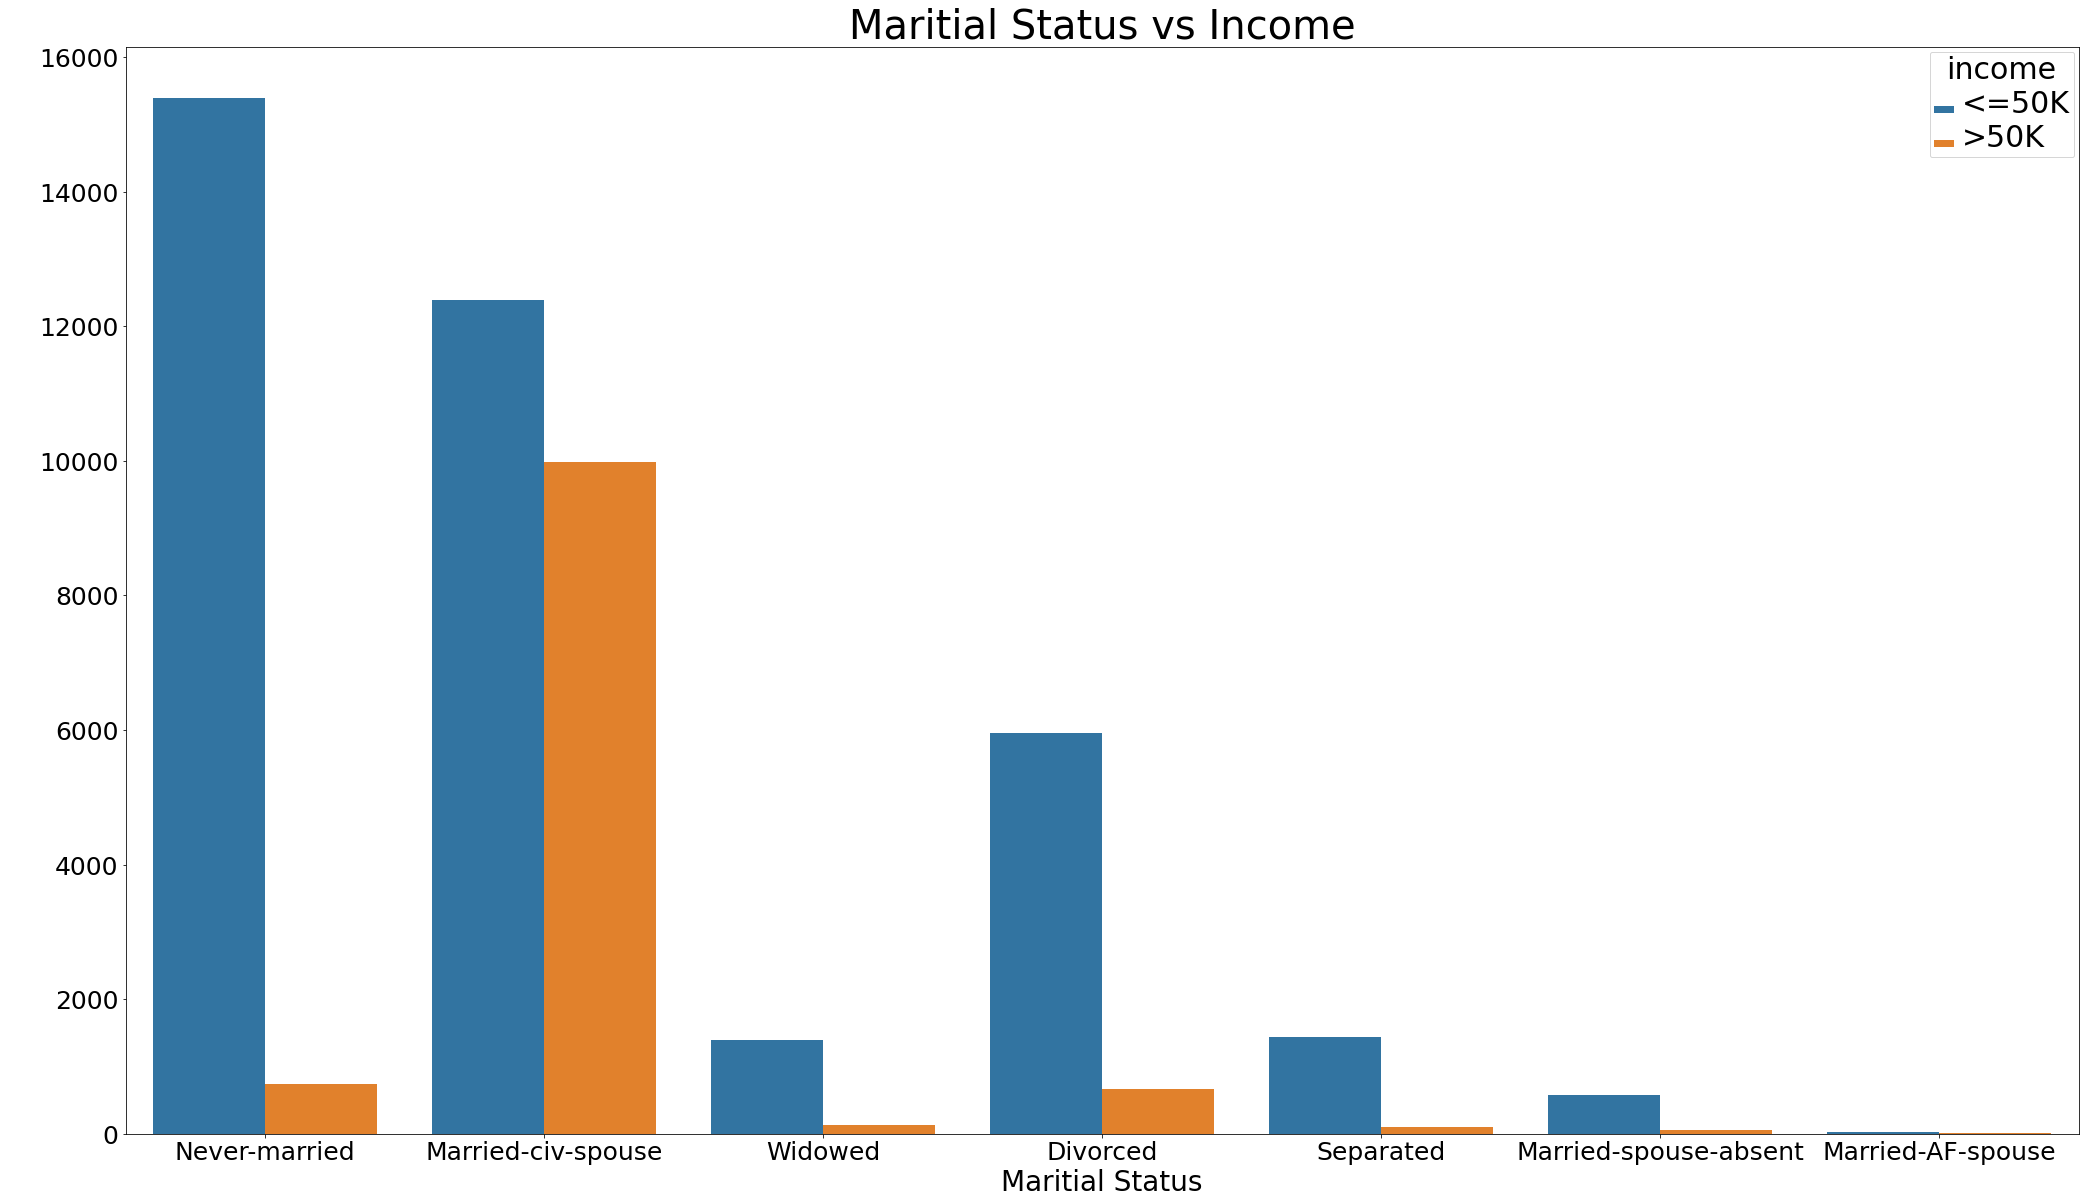

In [22]:
plt.figure(figsize=(35,20))
ax = sns.countplot(x="marita_lstatus", hue="income", data=data)
plt.xlabel("Maritial Status", fontsize=28)
plt.ylabel(" ", fontsize=28)
plt.title("Maritial Status vs Income", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.setp(ax.get_legend().get_texts(), fontsize='30')
plt.setp(ax.get_legend().get_title(), fontsize='30')

In [23]:
#Married-civ-spouse,Married-AF-spouse have high chance of getting more salary
#this variable doesnt look usefull though.

In [24]:
t = pd.crosstab(data.occupation,columns=data.income).apply(lambda r: r/r.sum(), axis=1)
t
tab = pd.crosstab(data.occupation, columns="counts")
print(t,tab)

income                <=50K      >50K
occupation                           
Adm-clerical       0.863126  0.136874
Armed-Forces       0.666667  0.333333
Craft-repair       0.773724  0.226276
Exec-managerial    0.522182  0.477818
Farming-fishing    0.883893  0.116107
Handlers-cleaners  0.933398  0.066602
Machine-op-inspct  0.876903  0.123097
Other-service      0.958562  0.041438
Priv-house-serv    0.987603  0.012397
Prof-specialty     0.548931  0.451069
Protective-serv    0.686673  0.313327
Sales              0.732013  0.267987
Tech-support       0.709544  0.290456
Transport-moving   0.795754  0.204246 col_0              counts
occupation               
Adm-clerical         5611
Armed-Forces           15
Craft-repair         6112
Exec-managerial      6086
Farming-fishing      1490
Handlers-cleaners    2072
Machine-op-inspct    3022
Other-service        4923
Priv-house-serv       242
Prof-specialty       6172
Protective-serv       983
Sales                5504
Tech-support         1446
Tr

[None, None]

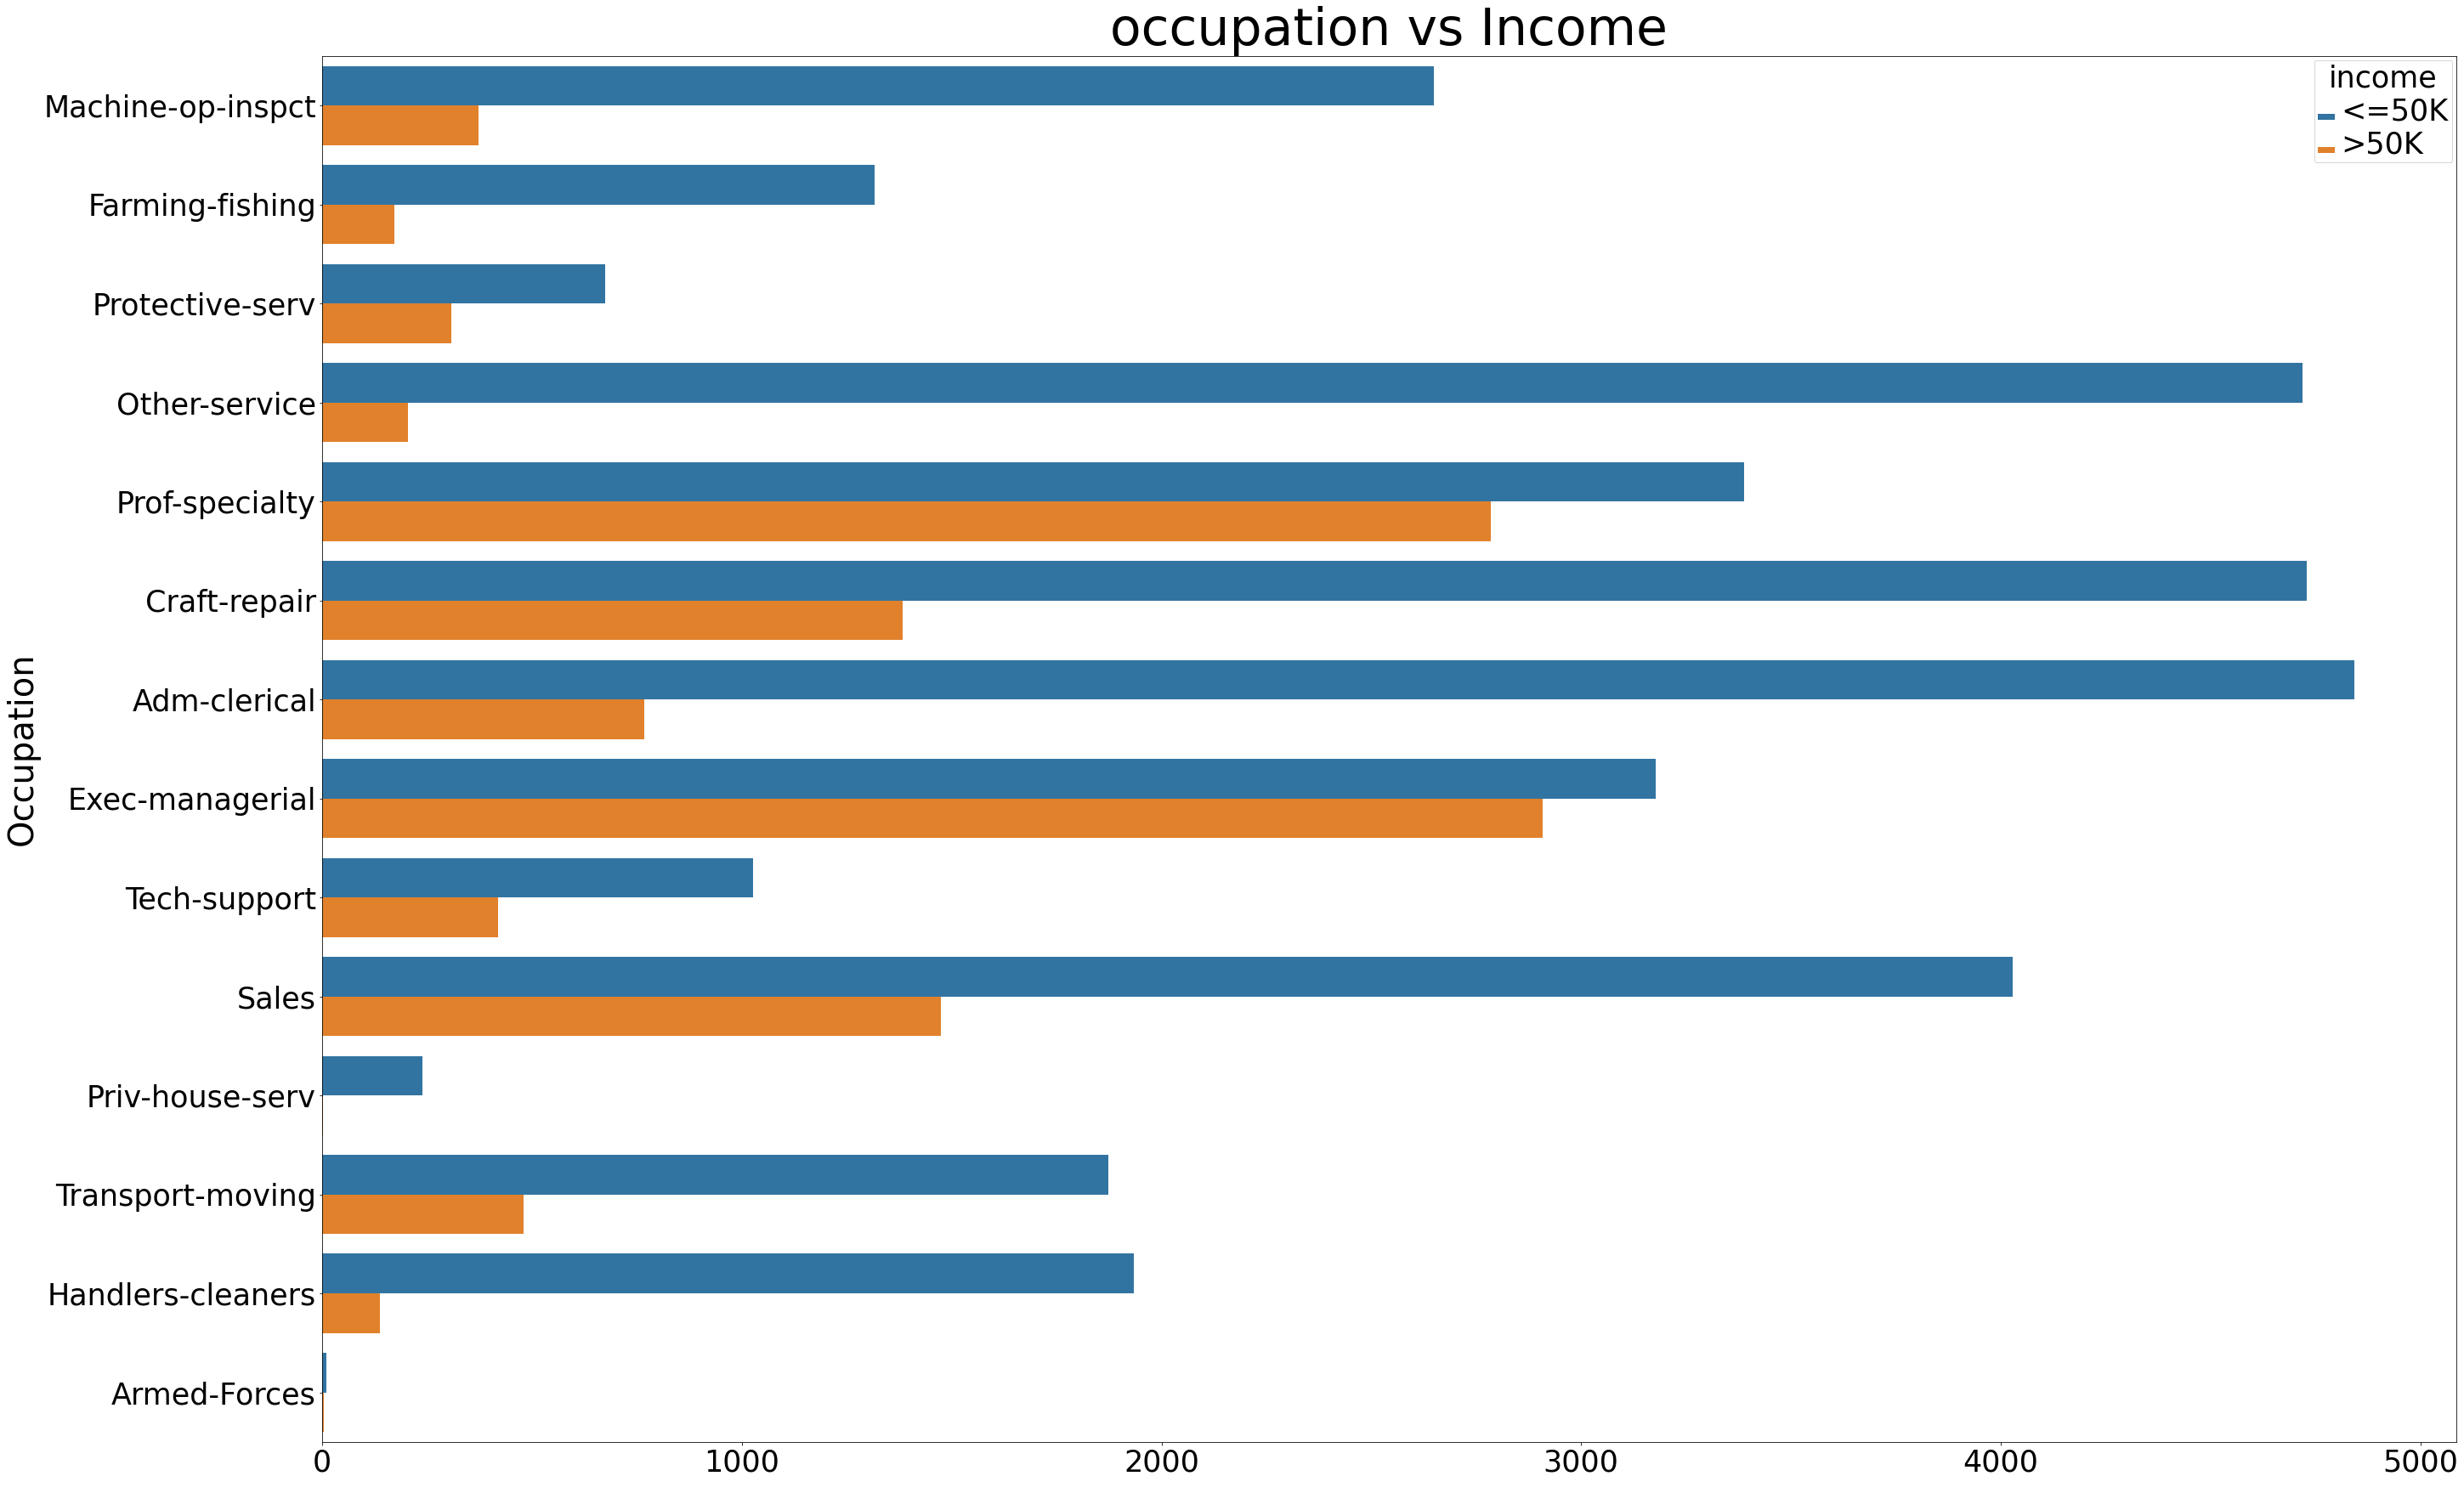

In [25]:
plt.figure(figsize=(45,30))
ax = sns.countplot(y="occupation", hue="income", data=data)
plt.xlabel(" ", fontsize=28)
plt.ylabel("Occupation", fontsize=40)
plt.title("occupation vs Income", fontsize=60)
plt.tick_params(axis='both', which='major', labelsize=35)
plt.setp(ax.get_legend().get_texts(), fontsize='35')
plt.setp(ax.get_legend().get_title(), fontsize='35')

In [26]:
t = pd.crosstab(data.relationship,columns=data.income).apply(lambda r: r/r.sum(), axis=1)
tab = pd.crosstab(data.relationship, columns="counts")
print(t,tab)

income             <=50K      >50K
relationship                      
Husband         0.551329  0.448671
Not-in-family   0.898593  0.101407
Other-relative  0.965471  0.034529
Own-child       0.985358  0.014642
Unmarried       0.939707  0.060293
Wife            0.531103  0.468897 col_0           counts
relationship          
Husband          19716
Not-in-family    12583
Other-relative    1506
Own-child         7581
Unmarried         5125
Wife              2331


[None, None]

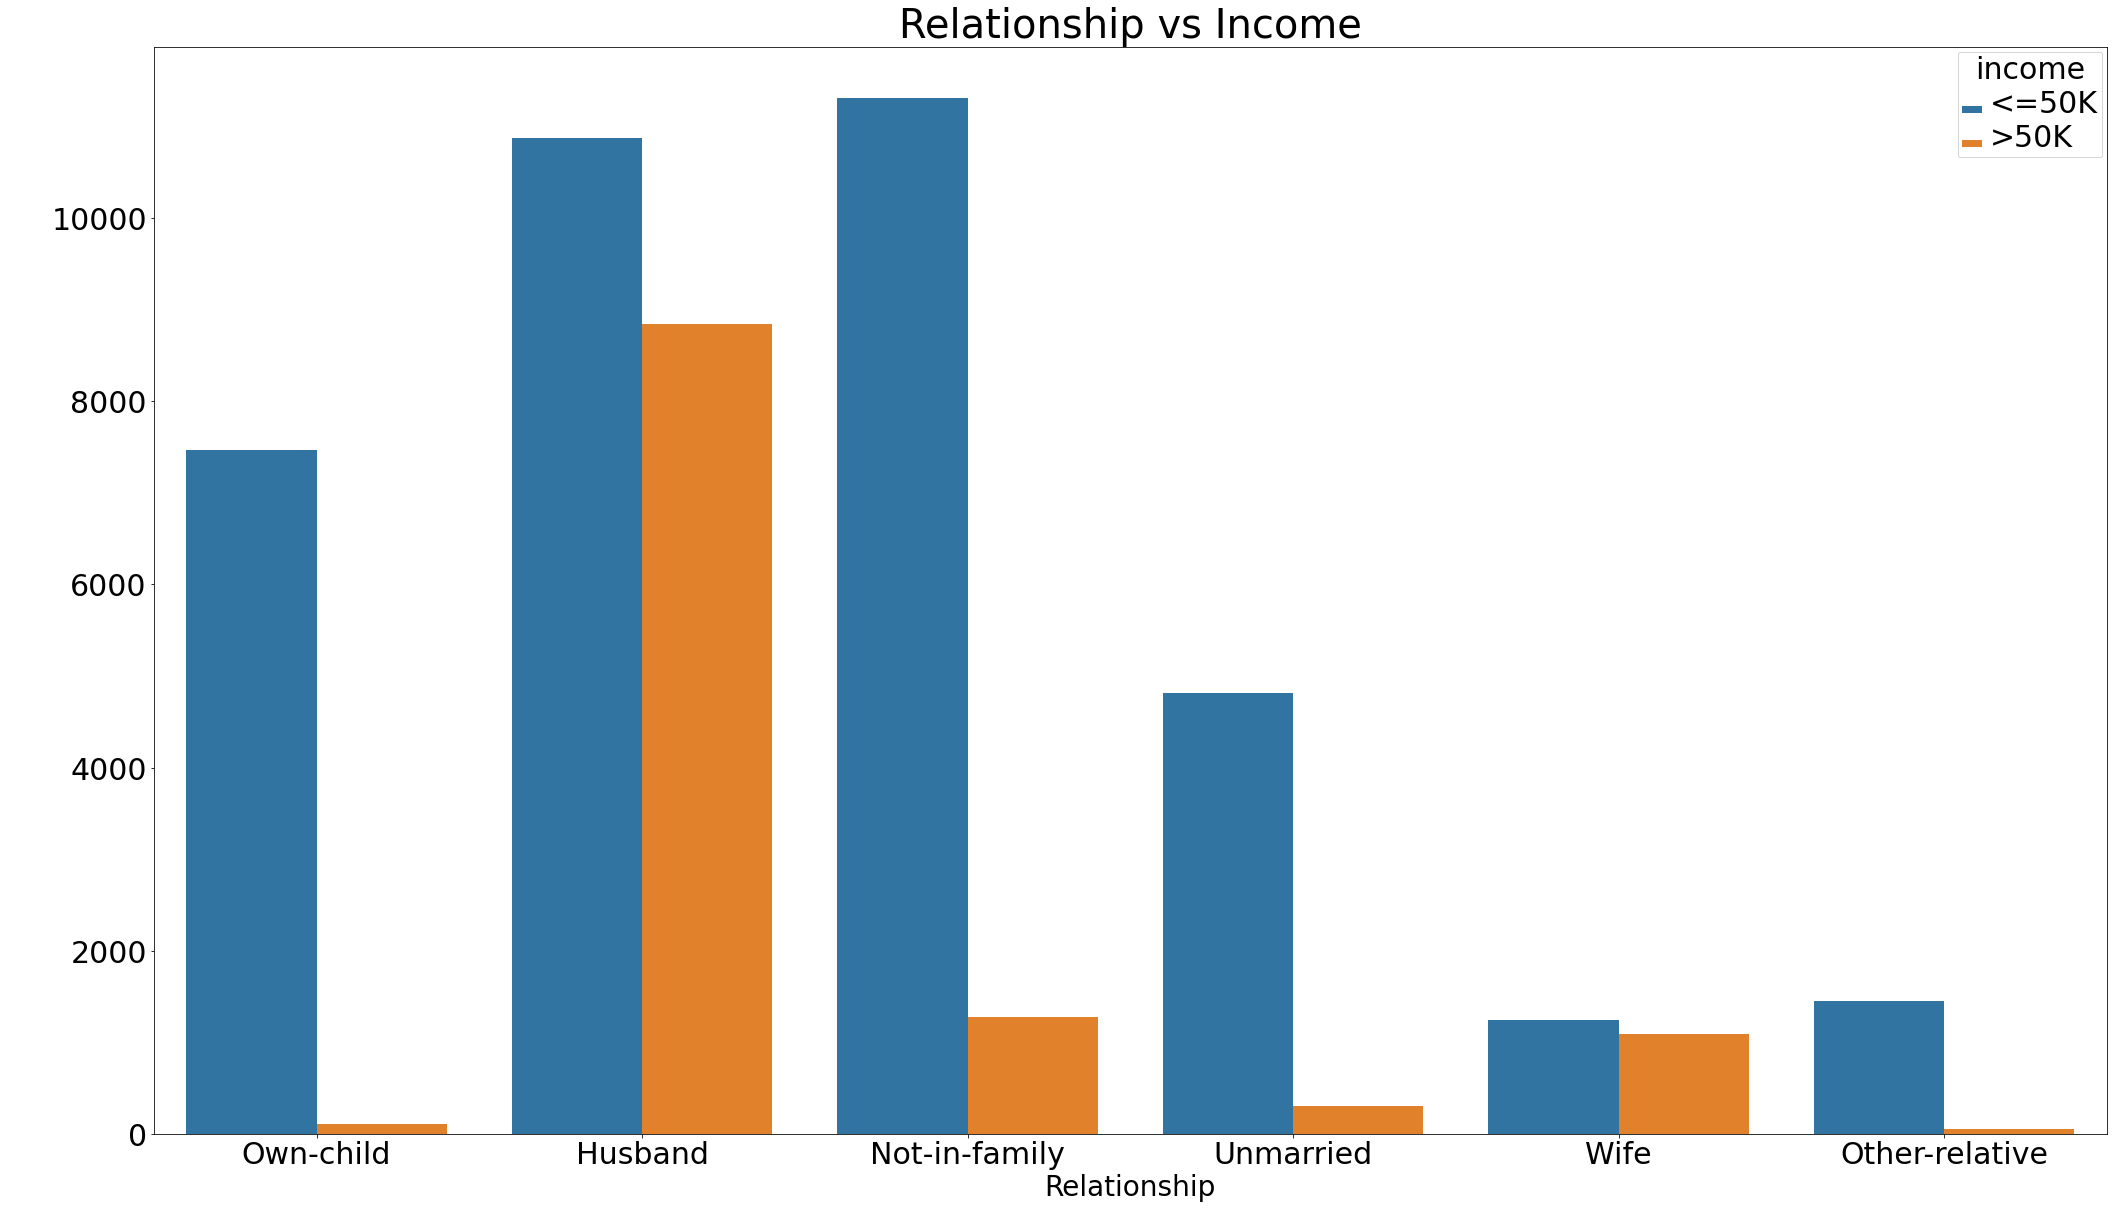

In [27]:
plt.figure(figsize=(35,20))
ax = sns.countplot(x="relationship", hue="income", data=data)
plt.xlabel("Relationship", fontsize=28)
plt.ylabel(" ", fontsize=40)
plt.title("Relationship vs Income", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.setp(ax.get_legend().get_texts(), fontsize='30')
plt.setp(ax.get_legend().get_title(), fontsize='30')

In [28]:
#husband and wife are earning more

In [29]:
t = pd.crosstab(data.race,columns=data.income).apply(lambda r: r/r.sum(), axis=1)
tab = pd.crosstab(data.race, columns="counts")
print(t,tab)

income                 <=50K      >50K
race                                  
Amer-Indian-Eskimo  0.882979  0.117021
Asian-Pac-Islander  0.730744  0.269256
Black               0.879189  0.120811
Other               0.876847  0.123153
White               0.746013  0.253987 col_0               counts
race                      
Amer-Indian-Eskimo     470
Asian-Pac-Islander    1519
Black                 4685
Other                  406
White                41762


In [30]:
t = pd.crosstab(data.gender,columns=data.income).apply(lambda r: r/r.sum(), axis=1)
tab = pd.crosstab(data.gender, columns="counts")
print(t,tab)

income     <=50K      >50K
gender                    
Female  0.890749  0.109251
Male    0.696233  0.303767 col_0   counts
gender        
Female   16192
Male     32650


In [31]:
#male earns more

[None, None]

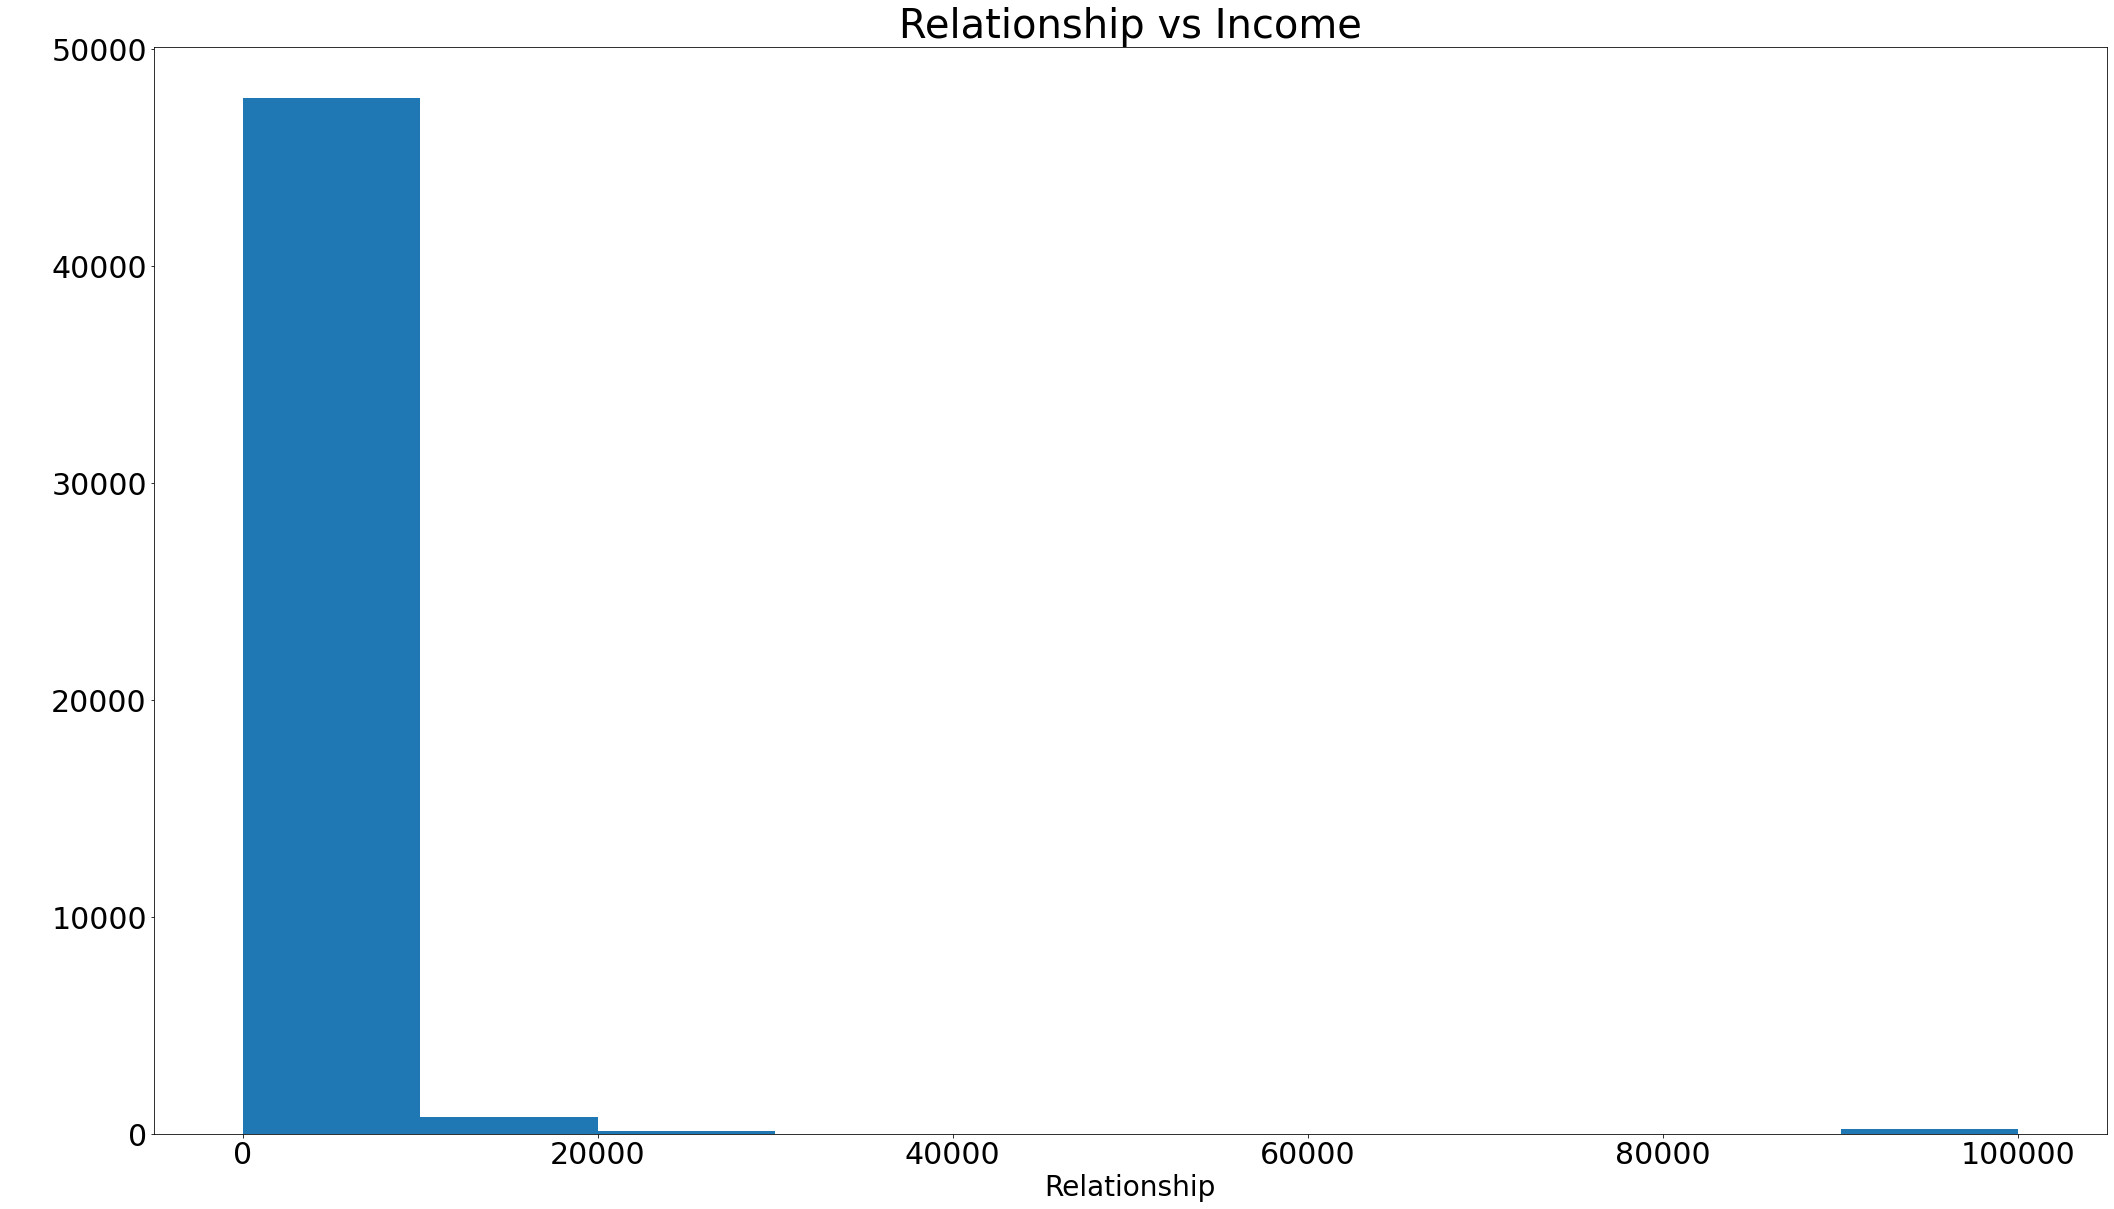

In [32]:
plt.figure(figsize=(35,20))
plt.hist(data.capital_gain)
plt.xlabel("Relationship", fontsize=28)
plt.ylabel(" ", fontsize=40)
plt.title("Relationship vs Income", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.setp(ax.get_legend().get_texts(), fontsize='30')
plt.setp(ax.get_legend().get_title(), fontsize='30')

In [33]:
skew(data.capital_gain)

11.894293693350866

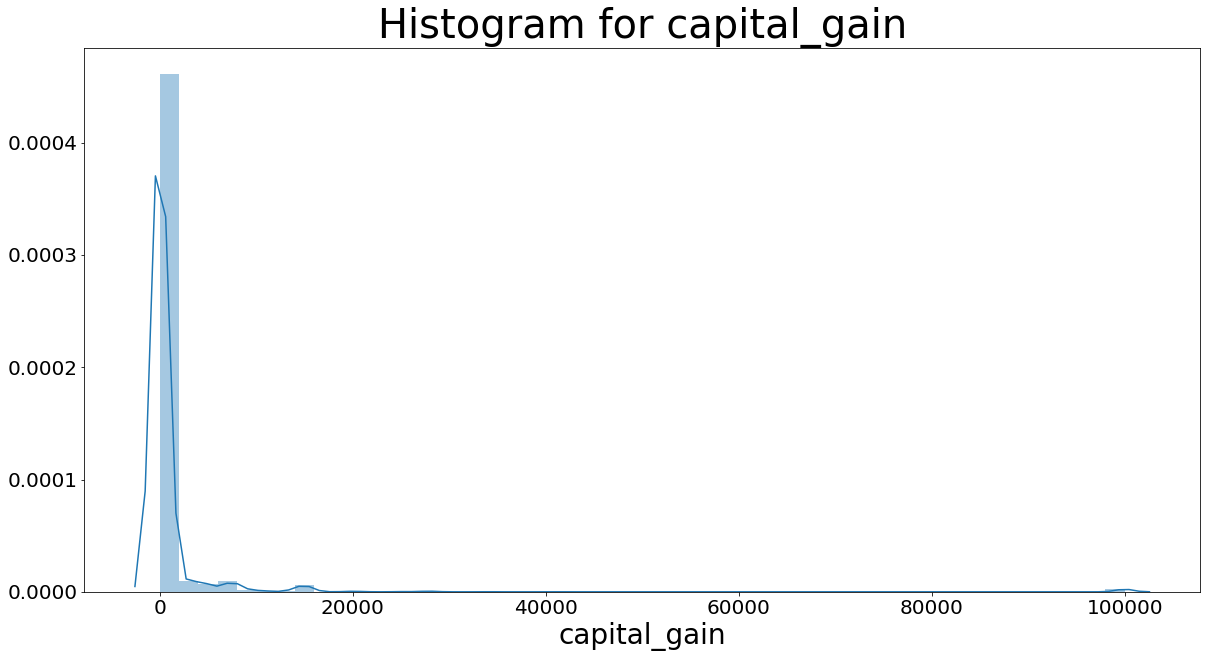

In [34]:
plt.figure(figsize=(20,10))
sns.distplot(data.capital_gain)
plt.xlabel("capital_gain", fontsize=28)
#plt.ylabel("No. of Bedrooms", fontsize=28)
plt.title("Histogram for capital_gain", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [35]:
skew(data.capital_loss)

4.569668511893424

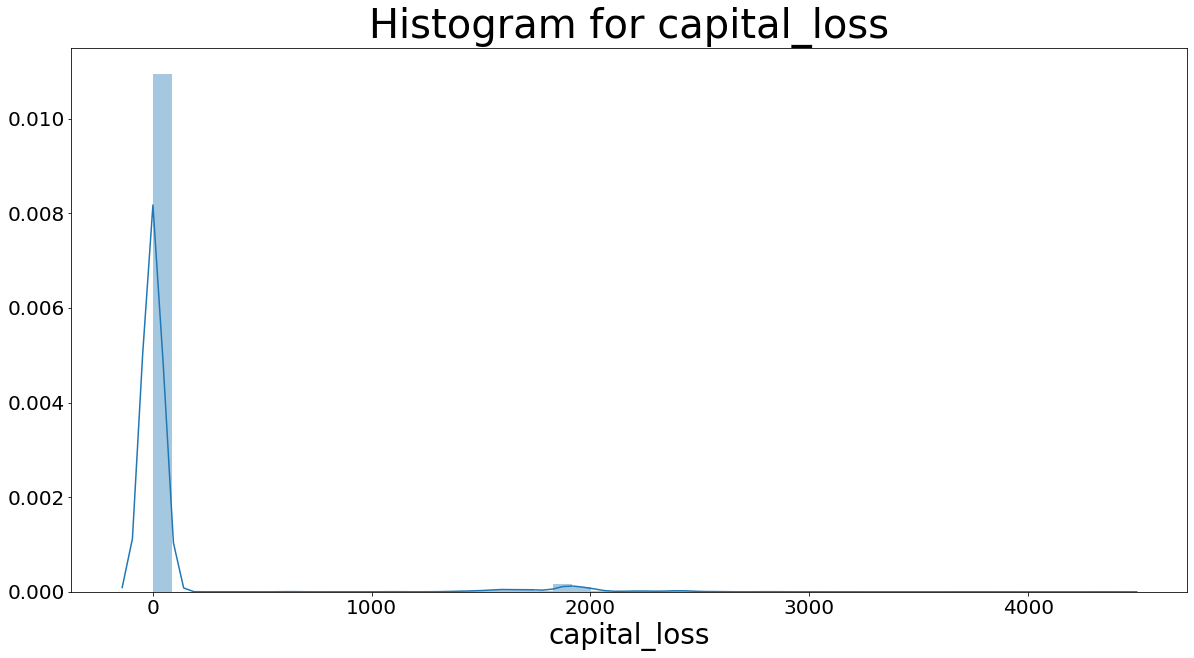

In [36]:
plt.figure(figsize=(20,10))
sns.distplot(data.capital_loss)
plt.xlabel("capital_loss", fontsize=28)
#plt.ylabel("No. of Bedrooms", fontsize=28)
plt.title("Histogram for capital_loss", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [37]:
#capital gain and capital loss are highly skewed

In [38]:
data_log = data.copy()

In [39]:
data_log['capital_gain'] = np.log(data_log['capital_gain'] + 1)
data_log['capital_loss'] = np.log(data_log['capital_loss'] + 1)

In [40]:
skew(data_log.capital_gain)

3.1135347595053386

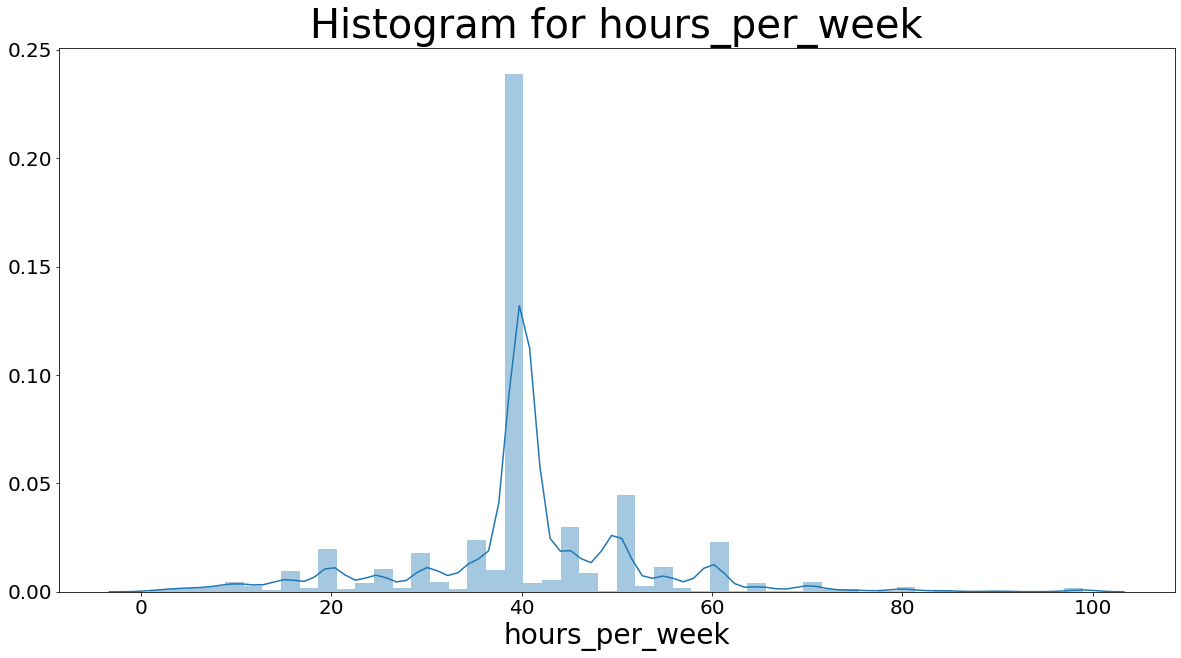

In [41]:
#sns.distplot(data.hours_per_week)
#plt.hist(data.hours_per_week)

plt.figure(figsize=(20,10))
sns.distplot(data.hours_per_week)
plt.xlabel("hours_per_week", fontsize=28)
#plt.ylabel("No. of Bedrooms", fontsize=28)
plt.title("Histogram for hours_per_week", fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)

In [42]:
skew(data_log.hours_per_week)

0.23874232483428423

In [43]:
data.hours_per_week.describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

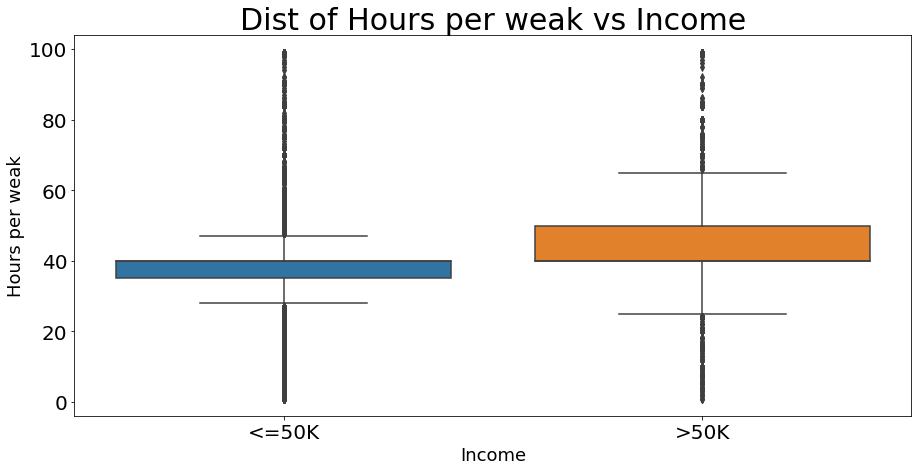

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(x="income", y="hours_per_week", data=data)
plt.xlabel("Income", fontsize=18)
plt.ylabel("Hours per weak", fontsize=18)
plt.title("Dist of Hours per weak vs Income", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)

In [45]:
#work time is more where person is earning >50

In [46]:
t = pd.crosstab(data.native_country,columns=data.income).apply(lambda r: r/r.sum(), axis=1)
tab = pd.crosstab(data.native_country, columns="counts")
print(t,tab)

income                         <=50K      >50K
native_country                                
Cambodia                    0.678571  0.321429
Canada                      0.653846  0.346154
China                       0.704918  0.295082
Columbia                    0.952941  0.047059
Cuba                        0.753623  0.246377
Dominican-Republic          0.951456  0.048544
Ecuador                     0.866667  0.133333
El-Salvador                 0.929032  0.070968
England                     0.629921  0.370079
France                      0.578947  0.421053
Germany                     0.718447  0.281553
Greece                      0.632653  0.367347
Guatemala                   0.965909  0.034091
Haiti                       0.880000  0.120000
Holand-Netherlands          1.000000  0.000000
Honduras                    0.900000  0.100000
Hong                        0.733333  0.266667
Hungary                     0.684211  0.315789
India                       0.589404  0.410596
Iran         

In [47]:
data = data[(data.workclass != '?') | (data.occupation != '?') | (data.native_country != '?')]

# feature scalling

In [48]:
# feature scalling
data_scaled = data_log[['age','educational_num','capital_gain','capital_loss','hours_per_week']].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [49]:
data_scaled.head()

,age,educational_num,capital_gain,capital_loss,hours_per_week
0,0.109589,0.400000,0.000000,0.0,0.397959
1,0.287671,0.533333,0.000000,0.0,0.500000
2,0.150685,0.733333,0.000000,0.0,0.397959
3,0.369863,0.600000,0.777174,0.0,0.397959
4,0.013699,0.600000,0.000000,0.0,0.295918


In [50]:
data=data_log.drop(['age','educational_num','capital_gain','capital_loss','hours_per_week'], axis=1)

In [51]:
data=pd.concat([data, data_scaled], axis=1)

In [52]:
data.head(1)

,workclass,education,marita_lstatus,occupation,relationship,race,gender,native_country,income,age,educational_num,capital_gain,capital_loss,hours_per_week
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K,0.109589,0.4,0.0,0.0,0.397959


### Creating dummies

In [53]:
workclass_dummy=pd.get_dummies(data['workclass'], prefix='workclass',drop_first=True)

In [54]:
education_dummy=pd.get_dummies(data['education'], prefix='education',drop_first=True)

In [55]:
marita_lstatus_dummy=pd.get_dummies(data['marita_lstatus'], prefix='marita_lstatus',drop_first=True)

In [56]:
occupation_dummy=pd.get_dummies(data['occupation'], prefix='occupation',drop_first=True)

In [57]:
relationship_dummy=pd.get_dummies(data['relationship'], prefix='relationship',drop_first=True)

In [58]:
race_dummy=pd.get_dummies(data['race'], prefix='race',drop_first=True)

In [59]:
gender_dummy=pd.get_dummies(data['gender'], prefix='gender',drop_first=True)

In [60]:
native_country_dummy=pd.get_dummies(data['native_country'], prefix='native_country',drop_first=True)

In [61]:
data=pd.concat([data, workclass_dummy,education_dummy,marita_lstatus_dummy,occupation_dummy,relationship_dummy,race_dummy,gender_dummy,native_country_dummy], axis=1)

In [62]:
data=data.drop(['workclass','education','marita_lstatus','occupation','relationship','race','gender','native_country'], axis=1)

In [63]:
X = data.drop(['income'], axis=1)
y = data[['income']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 100)

In [65]:
clf_gini = DecisionTreeClassifier( random_state = 0, min_samples_leaf=50)

In [66]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=0)

In [67]:
pred=clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) 
#all 0.857
#without workclass same
#without education
#workclass education

0.8590732273254623

[Text(539.876066276826, 532.275, 'marita_lstatus_Married-AF-spouse <= 0.5\ngini = 0.364\nsamples = 34189\nvalue = [26008, 8181]'),
 Text(365.4174510542169, 509.625, 'educational_num <= 0.77\ngini = 0.121\nsamples = 18549\nvalue = [17345, 1204]'),
 Text(317.05176957831327, 486.975, 'age <= 0.833\ngini = 0.095\nsamples = 18241\nvalue = [17334, 907]'),
 Text(237.23606927710844, 464.32500000000005, 'capital_gain <= 0.92\ngini = 0.072\nsamples = 17257\nvalue = [16616, 641]'),
 Text(234.6336596385542, 441.675, 'capital_loss <= 0.423\ngini = 0.067\nsamples = 17170\nvalue = [16572, 598]'),
 Text(137.05346385542168, 419.025, 'income <= 0.226\ngini = 0.04\nsamples = 13915\nvalue = [13633, 282]'),
 Text(54.97590361445783, 396.375, 'income <= 0.13\ngini = 0.013\nsamples = 8239\nvalue = [8187, 52]'),
 Text(32.53012048192771, 373.725, 'education_Assoc-voc <= 0.5\ngini = 0.005\nsamples = 5735\nvalue = [5722, 13]'),
 Text(26.02409638554217, 351.07500000000005, 'occupation_Prof-specialty <= 0.5\ngini =

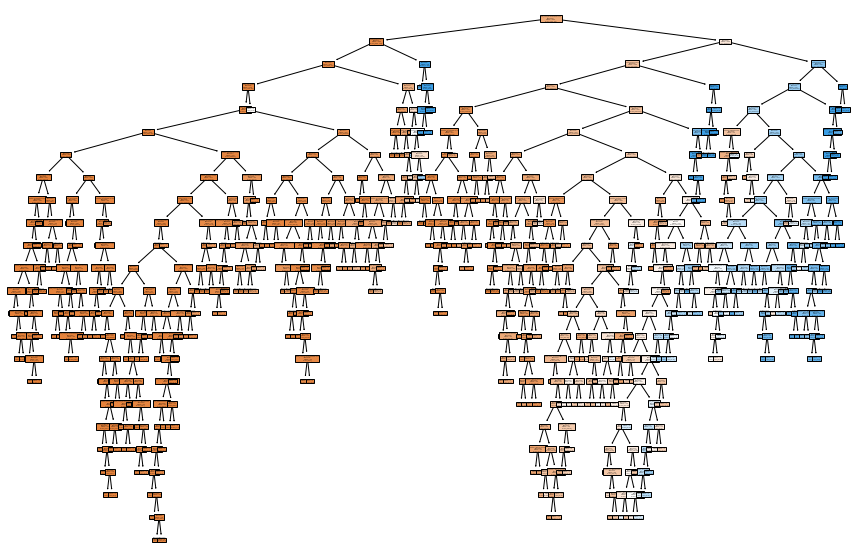

In [68]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini,filled=True,feature_names=data.columns)

In [69]:
# removing education,workclass,maritial status and occupation
data = pd.read_csv('D:\\study\\decisiontree\\adult.csv')
data=data.drop(['fnlwgt'], axis=1)
data.dropna()
# feature scalling
data_scaled = data[['age','educational_num','capital_gain','capital_loss','hours_per_week']].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
data=data.drop(['age','educational_num','capital_gain','capital_loss','hours_per_week'], axis=1)

data=pd.concat([data, data_scaled], axis=1)

workclass_dummy=pd.get_dummies(data['workclass'], prefix='workclass',drop_first=True)
education_dummy=pd.get_dummies(data['education'], prefix='education',drop_first=True)
marita_lstatus_dummy=pd.get_dummies(data['marita_lstatus'], prefix='marita_lstatus',drop_first=True)
occupation_dummy=pd.get_dummies(data['occupation'], prefix='occupation',drop_first=True)
relationship_dummy=pd.get_dummies(data['relationship'], prefix='relationship',drop_first=True)
race_dummy=pd.get_dummies(data['race'], prefix='race',drop_first=True)
gender_dummy=pd.get_dummies(data['gender'], prefix='gender',drop_first=True)
native_country_dummy=pd.get_dummies(data['native_country'], prefix='native_country',drop_first=True)

data=data.drop(['workclass','education','marita_lstatus','occupation','relationship','race','gender','native_country'], axis=1)
data=pd.concat([data,relationship_dummy,race_dummy,gender_dummy,native_country_dummy], axis=1)

X = data.drop(['income'], axis=1)
y = data[['income']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 100)
clf_gini = DecisionTreeClassifier( random_state = 0, min_samples_leaf=50)
clf_gini.fit(X_train, y_train)
pred=clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) 

0.849450624445506

# bagging

In [70]:
data = pd.read_csv('D:\\study\\decisiontree\\adult.csv')
data=data.drop(['fnlwgt'], axis=1)
data.dropna()
# feature scalling
data_scaled = data[['age','educational_num','capital_gain','capital_loss','hours_per_week']].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
data=data.drop(['age','educational_num','capital_gain','capital_loss','hours_per_week'], axis=1)

data=pd.concat([data, data_scaled], axis=1)

workclass_dummy=pd.get_dummies(data['workclass'], prefix='workclass',drop_first=True)
education_dummy=pd.get_dummies(data['education'], prefix='education',drop_first=True)
marita_lstatus_dummy=pd.get_dummies(data['marita_lstatus'], prefix='marita_lstatus',drop_first=True)
occupation_dummy=pd.get_dummies(data['occupation'], prefix='occupation',drop_first=True)
relationship_dummy=pd.get_dummies(data['relationship'], prefix='relationship',drop_first=True)
race_dummy=pd.get_dummies(data['race'], prefix='race',drop_first=True)
gender_dummy=pd.get_dummies(data['gender'], prefix='gender',drop_first=True)
native_country_dummy=pd.get_dummies(data['native_country'], prefix='native_country',drop_first=True)

In [71]:
data=data.drop(['workclass','education','marita_lstatus','occupation','relationship','race','gender','native_country'], axis=1)
data=pd.concat([data, workclass_dummy,education_dummy,marita_lstatus_dummy,occupation_dummy,relationship_dummy,race_dummy,gender_dummy,native_country_dummy], axis=1)

X = data.drop(['income'], axis=1)
y = data[['income']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 100)

In [72]:
bg = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=50),max_samples=0.5, max_features = 1.0,n_estimators = 200)
bg.fit(X_train, y_train)

d:\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=50),
                  max_samples=0.5, n_estimators=200)

In [73]:
pred=bg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8581177915785163

# Boosting

In [74]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=200, random_state=0)

In [75]:
clf.fit(X_train, y_train)

d:\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(n_estimators=200, random_state=0)

In [76]:
pred=clf.predict(X_test)

In [77]:
accuracy_score(y_test, pred)

0.8675356582269842

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

d:\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.840442230260015